**Credit:** Adapted from CS161-MIT (originally developed by Mary Wotters and modified by Nima Anari, Moses Charikar, etc). THANK YOU for open source!


# Sorting: Quicksort

Here's a quick-and-dirty implementation of QuickSort. It iterates through the input array A and creates two arrays, one with elements smallest than the pivot, and one with elemenst larger than the pivot. Therefore it's not in place. 

Note that this is actually randomized quicksort, because it chooses the pivot randomly. 

In [1]:
from random import choice

def naiveQuickSort(A):
    if len(A) <= 1:
        return A
    L = []
    R = []
    p = choice(range(len(A))) # random pivot
    E = [A[p]] # this is a list of all the things that are equal to the pivot.
    for i in range(len(A)):
        if i == p:
            continue
        if A[i] < A[p]:
            L.append(A[i])
        elif A[i] > A[p]:
            R.append(A[i])
        else:
            E.append(A[i])
    return naiveQuickSort(L) + E + naiveQuickSort(R)

In [2]:
# sanity check
A = [1,4,1,23,6,6,3,2,4]
naiveQuickSort(A)

[1, 1, 2, 3, 4, 4, 6, 6, 23]

And here are two slicker implementations which are both are in-place (so they use less memory).

In [3]:
## First, a few helper functions:

# swap A[i] with A[j]
def swap(A, i, j):
    tmp = A[i]
    A[i] = A[j]
    A[j] = tmp

# the Lomuto partition
def partition1(A, start, end, p):
    # first put the pivot at the end
    x = A[p]
    swap(A, p, end-1)
    i = start - 1
    for j in range(start, end-1):
        if A[j] <= x:
            i += 1
            swap(A, i, j)
    # at this point all of the things <=i are smaller than the pivot, and > i are larger
    # so put the pivot back where it needs to go.
    swap(A, i+1, end-1)
    return i+1


# Here is a different in-place Partition algorithm.  
#This was the original one described by Hoare when he introduced Quicksort
def partition2(A, start, end, p):
    # first swap to put the pivot at the end
    x = A[p]
    swap(A, p, end-1)
    # walk pointers up and down the array in opposite directions, switching things until they are in the right place.
    leftP = start
    rightP = end-1 
    while True:
        while leftP < end-1 and A[leftP] <= x:
            leftP += 1
        while rightP > start and A[rightP] >= x:
            rightP -= 1
        if leftP >= rightP:
            break
        # now switch them.
        swap(A, leftP, rightP)
    # now put the pivot value in the right place and return that location
    swap(A, end-1, leftP)
    return leftP
        
# Finally, the quickSort algorithm.  
# In addition to A, it also takes an optional input "partition" which is which partition function to use.
def quickSort(A, partition=partition1):
    return quickSortHelper(A, 0, len(A), partition)
        
def quickSortHelper(A, start, end, partition):
    if end - start <= 1:
        return 
    # choose a random pivot:
    p = choice(range(start, end)) 
    # partition around the pivot:
    pivotLocation = partition( A, start, end, p ) 
    # recurse:
    quickSortHelper(A,start, pivotLocation ,partition)
    quickSortHelper(A,pivotLocation + 1, end, partition)
    return

# define two versions of quicksort, one for each partition function, so we can compare later.
def quickSort1(A):
    return quickSort(A, partition1)
def quickSort2(A):
    return quickSort(A, partition2)

In [4]:
# sanity check
A = [5,4,2,3,1,1,2,3,4,5,234]
quickSort1(A)
print(A)
quickSort2(A)
print(A)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 234]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 234]


Let's compare all three Quicksort above and see what we learn.  
And let's compare Quicksort to MergeSort.

In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import time 

# tryItABunch: runs a function a bunch, and times how long it takes.
#
# Input: myFn: a function which takes as input a list of integers
# Output: lists nValues and tValues so that running myFn on a list of length nValues[i] took 
# (on average over numTrials tests) time tValues[i] milliseconds.
#
# Other optional args:
#    - startN: smallest n to test
#    - endN: largest n to test
#    - stepSize: test n's in increments of stepSize between startN and endN
#    - numTrials: for each n tests, do numTrials tests and average them
#    - listMax: the input lists of length n will have values drawn uniformly at random from range(listMax)
def tryItABunch(myFn, startN=10, endN=100, stepSize=10, numTrials=20, listMax = 10):
    nValues = []
    tValues = []
    for n in range(startN, endN, stepSize):
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            lst = [ choice(range(listMax)) for i in range(n) ] # generate a random list of length n
            start = time.time()
            myFn( lst )
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues


In [12]:
nValsQuick, tValsQuick = tryItABunch(quickSort1, startN=50, endN=3000,stepSize=50,
                                    numTrials=10, listMax=10000)
nValsQuick2, tValsQuick2 = tryItABunch(quickSort2, startN=50, endN=3000,stepSize=50,
                                       numTrials=10, listMax=10000)
nValsQuickNaive, tValsQuickNaive = tryItABunch(naiveQuickSort, startN=50, endN=3000,stepSize=50,
                                               numTrials=10, listMax=10000)

And here's mergesort: 

In [13]:
# merge two sorted arrays to return a sorted array
def merge(L, R):
    i = 0 # current index in the L array
    j = 0 # current index in the R array
    ret = []
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            ret.append(L[i])
            i += 1
        else:   # ties go to R.  Doesn't really matter.
            ret.append(R[j])
            j += 1
    while i < len(L):
        ret.append(L[i])
        i += 1
    while j < len(R):
        ret.append(R[j])
        j+= 1
    return ret
        
def mergeSort(A):
    n = len(A)
    if n <= 1:
        return A
    L = mergeSort(A[:round(n/2)])
    R = mergeSort(A[round(n/2):n])
    return merge(L,R)

In [14]:
nValsMerge, tValsMerge = tryItABunch(mergeSort, startN=50, endN=3000,stepSize=50, 
                                     numTrials=50, listMax=10000)

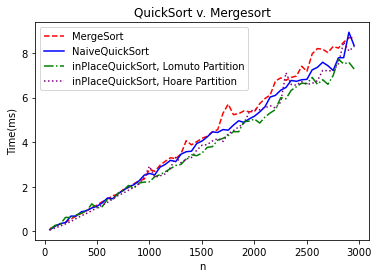

In [15]:
plt.plot( nValsMerge, tValsMerge, "--", color="red", label="MergeSort" )
plt.plot( nValsQuickNaive, tValsQuickNaive, color="blue", label="NaiveQuickSort" )
plt.plot( nValsQuick, tValsQuick, "-.", color="green", label="inPlaceQuickSort, Lomuto Partition" )
plt.plot( nValsQuick2, tValsQuick2, ":", color="purple", label="inPlaceQuickSort, Hoare Partition" )
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("QuickSort v. Mergesort")
plt.show()

Try changing the arguments and see how the plots change. 

What can you say based on the plots? 